In [ ]:

import os
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
os.environ['TF_ENABLE_ONEDNN_OPTS'] = "0"


In [ ]:
# Create a dataframe 
### Note this dataset will be used for decoder only ###

# Get all images from augmented directory and prepare a dataset such that every image gets
# associated with its respective QR code from pool of all QR codes


datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode="nearest"
)




In [ ]:
# First prepare the script which will augment the original images 

dataset_path = "dataset/original_images"



In [ ]:



def generate_watermark():
    # With probability p embed a watermark; else, use a blank watermark.
    p = 0.8  # 80% positive samples, 20% negatives
    if random.random() < p:
        # Randomly choose one QR code from the pool and return the QR code


        QR_directory = "dataset/qr_watermarks/"

        qr_codes_pool = os.listdir(QR_directory)

        np.random.shuffle(qr_codes_pool)

        idx = random.randint(0, len(qr_codes_pool) - 1)

        # Select the QR load it and return it in the array form
        QR_filname = qr_codes_pool[idx]

        qr_array = cv2.imread(os.path.join(QR_directory , QR_filname))
        # optional
        # qr_array = qr_image.astype('float32') / 255.0
        return qr_array
    else:
        return np.zeros((256, 256), dtype=np.float32) # blank watermark
    

def prepare_dataset():
    # Load every image and associate a QR with it 
    Images_Folder = "dataset/augmented_images/"

    all_augmented_images = os.listdir(Images_Folder)

    # Initialize the length of dataframe the length of the total images
    decoder_train_dataset = pd.DataFrame(columns=["embedded_image_array" , "expected_watermark"] , index=range(len(all_augmented_images)))
    

    for idx , image_path in enumerate(all_augmented_images):
        image_array = cv2.imread(Images_Folder + image_path)
        image_array = cv2.cvtColor(image_array , cv2.COLOR_BGR2RGB)
        watermark_image = generate_watermark()

        decoder_train_dataset.loc[idx ,'embedded_image_array'] = image_array
        decoder_train_dataset.loc[idx ,'expected_watermark'] = watermark_image

    return decoder_train_dataset

decoder_train_dataset = prepare_dataset()


decoder_train_dataset.head()


,embedded_image_array,expected_watermark
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,"[[[238, 238, 238], [238, 238, 238], [245, 245,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,"[[[238, 238, 238], [238, 238, 238], [238, 238,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,"[[[241, 241, 241], [238, 238, 238], [238, 238,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."


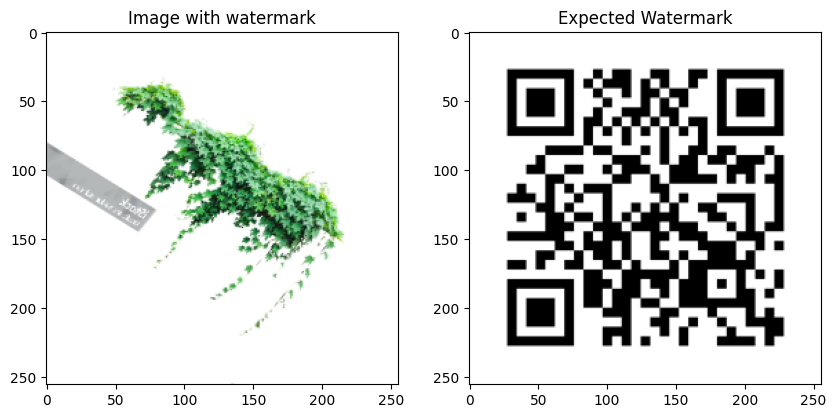

In [8]:
random_index = np.random.randint(0 , len(decoder_train_dataset)-1)

plt.figure(figsize=[10,6])

plt.subplot(1, 2 , 1)
plt.title("Image with watermark")
plt.imshow(decoder_train_dataset.loc[random_index , "embedded_image_array"])

plt.subplot(1,2,2)
plt.title("Expected Watermark")
plt.imshow(decoder_train_dataset.loc[random_index , "expected_watermark"])

plt.show()